# SENTIMENT ANALYSIS ON REVIEWS OF PASSENGERS ON US AIRLINES IN TWITTER 



This project on sentiment analysis aims at :-

1.   Predicting the sentiment of a tweet based on the content in it
2.   Show the diffenece in effectiveness of an ensemble,      discriminative and Generative learning algorithms in classifying large datasets using accuracy as a performance metric.








In [26]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re 
import nltk 
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD



In [27]:
reviews = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")

In [28]:
print(reviews.shape)
reviews.head()  

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# About the Dataset


> Dataframe **"reviews"** contains 14640 different sentimental tweets for various different US airline companies, based on the experiences of the passengers. The dataset contains 15 different features, out of which, we will be working on the **reviews["text"]** to predict the sentiment, or the **reviews["airline_sentiment"]**




# PREPROCESSING THE DATASET

In [29]:
# Extracting out the features and labels:-

features = reviews.iloc[:, 10].values     
labels = reviews["airline_sentiment"].values 

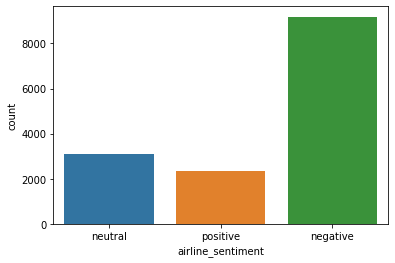

In [30]:
# Plotting the categorical variable counts in the labels 

sns.countplot(reviews.airline_sentiment)

In [31]:
reviews["airline_sentiment"].isna().sum()   # Checking for NAN values to either be imputed or dropped 
reviews["text"].isna().sum()

0

Since there are 3 different classes (Multiclass) possible for the sentiments, we will be using the Multinomial naive bayes in the **Generative classifier** where as, softmax classifier as **Discriminative classifier**

In [32]:
""" We will first need to convert the categorical 
    variables to numerical values to be able to fit
    the Softmax classifier """

""" We will thus define a new Series in the reviews df
    containing the numerical values and assign is as 
    label for the softmax calssifier"""
L = []
for j in range(14640):
  L.append(0)
reviews["airline_sentiment_categorical"] = L

for i in range(14640):
  if reviews["airline_sentiment"][i] == "neutral":
    reviews["airline_sentiment_categorical"][i] = 0.0
  elif reviews["airline_sentiment"][i] == "positive":
    reviews["airline_sentiment_categorical"][i] = 1.0
  elif reviews["airline_sentiment"][i] == "negative":
    reviews["airline_sentiment_categorical"][i] = 2.0
print(reviews["airline_sentiment_categorical"].shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(14640,)


In [33]:
print(reviews["airline_sentiment_categorical"].shape)
print(reviews["airline_sentiment_categorical"])


(14640,)
0        0
1        1
2        0
3        2
4        2
        ..
14635    1
14636    2
14637    0
14638    2
14639    0
Name: airline_sentiment_categorical, Length: 14640, dtype: int64


In [34]:
labels_sf = reviews["airline_sentiment_categorical"].values

In [35]:
""" Preporecessing the features using re library
    such as removing special charecters, making
    them lower case etc. """

processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [36]:
""" Initiating the tfidf vecorizer and creating a 
    document-term matrix. Common words aof enlish 
    eg. and, the are excluded"""

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words = 'english')
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [37]:
print(processed_features.shape)

(14640, 2195)


In [38]:
#  X_train, y_train...  are to be used in Randomforest classifier and multinomial naive bayes
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)   

#  X_train_sf, y_train_sf...  are to be used in Softmax classifier
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(processed_features, labels_sf, test_size=0.2, random_state=0)

#  Random state are kept the same on purpose

# RANDOM FOREST CLASSIFIER (ENSEMBLE LEARNING)

1.   List item
2.   List item



In [39]:
""" Creating a deep Random forest calssifier 
    with 3 cases, i.e. 150, 175 and 200 total number
    of tress and fitting it to the dataset, to find 
    the optimal number of trees, to best fit the data"""

RF_classifier_1 = RandomForestClassifier(n_estimators=150, random_state=0)
RF_classifier_1.fit(X_train, y_train)

RF_classifier_2 = RandomForestClassifier(n_estimators=175, random_state=0)
RF_classifier_2.fit(X_train, y_train)

RF_classifier_3 = RandomForestClassifier(n_estimators=200, random_state=0)
RF_classifier_3.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
RF_predictions_1 = RF_classifier_1.predict(X_test)
RF_predictions_2 = RF_classifier_2.predict(X_test)
RF_predictions_3 = RF_classifier_3.predict(X_test)

# Printing out the performance metrics of Random forest classifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print(confusion_matrix(y_test,RF_predictions))
# print(classification_report(y_test,RF_predictions))
print(accuracy_score(y_test, RF_predictions_1))
print(accuracy_score(y_test, RF_predictions_2))
print(accuracy_score(y_test, RF_predictions_3))

0.7517076502732241
0.7547814207650273
0.7534153005464481



Since we achieved the best accuracy of **0.7547** on a 175 decision trees **Random Forest Classifier**, we will go along with that 


# MULTINOMIAL NAVIE BAYES CLASSIFIER (GENERATIVE LEARNING)

In [41]:
model = MultinomialNB().fit(X_train, y_train)

In [42]:
MNB_predictions = model.predict(X_test)
print("Confusion matrix:", confusion_matrix(y_test, MNB_predictions))
print("Classification Report:", classification_report(y_test,MNB_predictions))
print("Accuracy:", accuracy_score(y_test ,MNB_predictions))

Confusion matrix: [[1814   45   11]
 [ 395  194   25]
 [ 210   37  197]]
Classification Report:               precision    recall  f1-score   support

    negative       0.75      0.97      0.85      1870
     neutral       0.70      0.32      0.44       614
    positive       0.85      0.44      0.58       444

    accuracy                           0.75      2928
   macro avg       0.77      0.58      0.62      2928
weighted avg       0.75      0.75      0.72      2928

Accuracy: 0.7530737704918032



We achieved an accuracy of **0.7530** (*slightly lower than Randomforest classifier*) on the Generative classifier **Multinomial Naive Bayes**

# SOFTMAX CLASSIFIER (DISCRIMINATIVE LEARNING)

In [43]:
""" Building a Softmax classifier using the 
    keras API from the TensorFlow library"""

# We will use the Sequential class to build a single layer Softmax classifier

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3, kernel_regularizer=tf.keras.regularizers.l1(0.00001), activation = "softmax"))


In [44]:
#  Compiling the model using the SGD optimizer
    
""" Since we havent converted the lables_sf to 
    one hot lables, we will be using the Spase
    Categorical Cross entropy as the loss function"""

model.compile(optimizer = SGD(learning_rate = 0.01), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [45]:
# Training the model to 20 epochs, using batch_size = 1 for BGD
EPOCHS = 25
model.fit(X_train_sf, y_train_sf, epochs = EPOCHS, batch_size = 1) 

Epoch 1/25
11712/11712 [==============================] - 24s 2ms/step - loss: 0.8669 - accuracy: 0.6286
Epoch 2/25
11712/11712 [==============================] - 24s 2ms/step - loss: 0.7820 - accuracy: 0.6569
Epoch 3/25
11712/11712 [==============================] - 26s 2ms/step - loss: 0.7339 - accuracy: 0.6799
Epoch 4/25
11712/11712 [==============================] - 24s 2ms/step - loss: 0.7023 - accuracy: 0.6989
Epoch 5/25
11712/11712 [==============================] - 24s 2ms/step - loss: 0.6786 - accuracy: 0.7133
Epoch 6/25
11712/11712 [==============================] - 24s 2ms/step - loss: 0.6599 - accuracy: 0.7244
Epoch 7/25
11712/11712 [==============================] - 25s 2ms/step - loss: 0.6443 - accuracy: 0.7345
Epoch 8/25
11712/11712 [==============================] - 24s 2ms/step - loss: 0.6316 - accuracy: 0.7421
Epoch 9/25
11712/11712 [==============================] - 24s 2ms/step - loss: 0.6206 - accuracy: 0.7487
Epoch 10/25
11712/11712 [==============================

In [47]:
model.fit(X_train_sf, y_train_sf, epochs = 2, batch_size = 1) #Training the model for 2 more Epochs

Epoch 1/2
11712/11712 [==============================] - 25s 2ms/step - loss: 0.5313 - accuracy: 0.7970
Epoch 2/2
11712/11712 [==============================] - 26s 2ms/step - loss: 0.5286 - accuracy: 0.7984


In [48]:
score = model.evaluate(X_test_sf, y_test_sf, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.5886461138725281
Test accuracy: 0.7684426307678223


We achieved an accuracy of **0.768** (* higher than Random forest or Multinomial naive bayes*) on the Discriminative classifier        Softmax Classifier

**HENCE, DISCRIMINATIVE LEARNING INDEEED PERFOMS BETTER ON LARGE DATASETS, SINCE THERE IS LESSSER ASSUMPTIONS ON THE DISTRIBUTION OF THE DATASET THEN IN GENERATIVE LEARNING ALOGITHMS**